In [1]:
import requests
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/cp9321/RNNs-comparison/main/NKE_2006-01-01_to_2018-01-01.csv" 
download = requests.get(url).content

dataset = pd.read_csv(io.StringIO(download.decode('utf-8')), index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.85,10.92,10.67,10.74,18468800,NKE
2006-01-04,10.71,10.80,10.67,10.69,15832000,NKE
2006-01-05,10.69,10.83,10.69,10.76,9256000,NKE
2006-01-06,10.79,10.83,10.71,10.72,7573600,NKE
2006-01-09,10.72,10.98,10.72,10.88,10441600,NKE


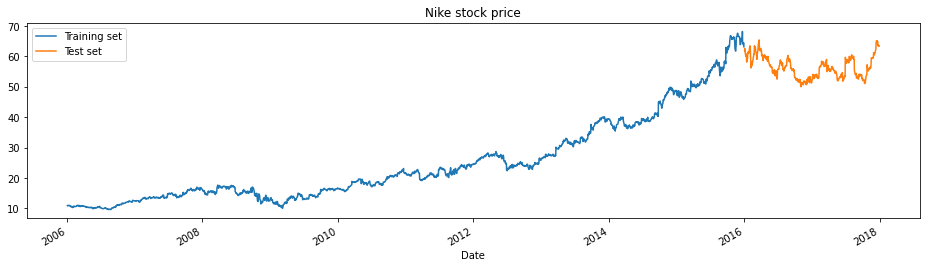

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
20/20 [==============================] - 6s 97ms/step - loss: 0.0771
Epoch 2/35
20/20 [==============================] - 2s 97ms/step - loss: 0.0508
Epoch 3/35
20/20 [====

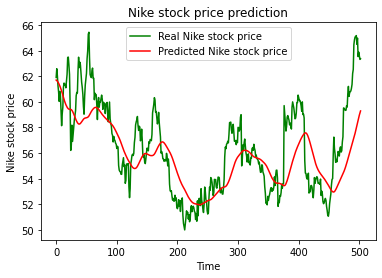

The root mean squared error is 2.4798421152109005.


In [ ]:
def pipeline_LSTM(year1, year2, col1, col2, name):
    training_set = dataset[:year1].iloc[:,col1:col2].values 
    test_set = dataset[year2:].iloc[:,col1:col2].values
    
    dataset[name][:year1].plot(figsize=(16,4),legend=True)
    dataset[name][year2:].plot(figsize=(16,4),legend=True)
    plt.legend(['Training set','Test set'])
    plt.title('Nike stock price')
    plt.show()

    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(training_set)
    X_train = []
    y_train = []
    for i in range(60,2517):
        X_train.append(training_set_scaled[i-60:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    
    model = Sequential() 
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), dropout=0.25))
    model.add(LSTM(units=50, return_sequences=True, dropout=0.25))
    model.add(LSTM(units=50, dropout=0.25))
    model.add(Dense(units=1))
    model.summary()
    
    model.compile(optimizer=SGD(learning_rate=0.005, decay=1e-6, momentum=0.5),loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=35,batch_size=125)
   
    tf.keras.utils.plot_model(model)
    dataset_total = pd.concat((dataset[name][:year1],dataset[name][year2:]),axis=0)
    inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)
    X_test = []
    for i in range(60,563):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    predicted_stock_price = model.predict(X_test, verbose=0)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    def plot_predictions(test,predicted):
        plt.plot(test, color='green',label='Real Nike stock price')
        plt.plot(predicted, color='red',label='Predicted Nike stock price')
        plt.title('Nike stock price prediction')
        plt.xlabel('Time')
        plt.ylabel('Nike stock price')
        plt.legend()
        plt.show()
    plot_predictions(test_set,predicted_stock_price)
    def return_rmse(test,predicted):
        rmse = math.sqrt(mean_squared_error(test, predicted))
        print("The root mean squared error is {}.".format(rmse))
    return_rmse(test_set,predicted_stock_price)

pipeline_LSTM ('2015', '2016', 1, 2, "High")

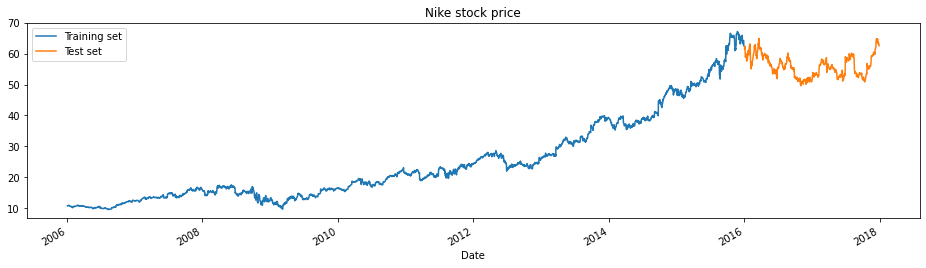

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 38,601
Trainable params: 38,601
Non-trainable params: 0
_________________________________________________________________
Epoch 1/35
20/20 [==============================] - 5s 97ms/step - loss: 0.0863
Epoch 2/35
20/20 [==============================] - 2s 97ms/step - loss: 0.0554
Epoch 3/35
20/20 [====

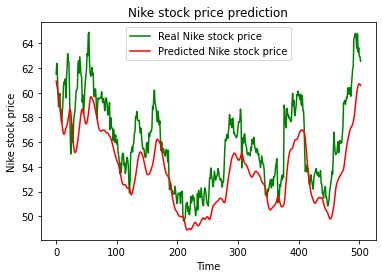

The root mean squared error is 2.6442151959132296.


In [ ]:
def pipeline_GRU(year1, year2, col1, col2, name):
    training_set = dataset[:year1].iloc[:,col1:col2].values 
    test_set = dataset[year2:].iloc[:,col1:col2].values
    
    dataset[name][:year1].plot(figsize=(16,4),legend=True)
    dataset[name][year2:].plot(figsize=(16,4),legend=True)
    plt.legend(['Training set','Test set'])
    plt.title('Nike stock price')
    plt.show()

    sc = MinMaxScaler(feature_range=(0,1))
    training_set_scaled = sc.fit_transform(training_set)
    X_train = []
    y_train = []
    for i in range(60,2517):
        X_train.append(training_set_scaled[i-60:i,0])
        y_train.append(training_set_scaled[i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1],1), dropout=0.25))
    model.add(GRU(units=50, return_sequences=True, dropout=0.25))
    model.add(GRU(units=50, dropout=0.25))
    model.add(Dense(units=1))
    model.summary()
    
    model.compile(optimizer=SGD(learning_rate=0.005, decay=1e-6, momentum=0.5),loss='mean_squared_error')
    model.fit(X_train,y_train,epochs=35,batch_size=125)
   
    tf.keras.utils.plot_model(model)
    dataset_total = pd.concat((dataset[name][:year1],dataset[name][year2:]),axis=0)
    inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = sc.transform(inputs)
    X_test = []
    for i in range(60,563):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

    predicted_stock_price = model.predict(X_test, verbose=0)
    predicted_stock_price = sc.inverse_transform(predicted_stock_price)

    def plot_predictions(test,predicted):
        plt.plot(test, color='green',label='Real Nike stock price')
        plt.plot(predicted, color='red',label='Predicted Nike stock price')
        plt.title('Nike stock price prediction')
        plt.xlabel('Time')
        plt.ylabel('Nike stock price')
        plt.legend()
        plt.show()
    plot_predictions(test_set,predicted_stock_price)
    def return_rmse(test,predicted):
        rmse = math.sqrt(mean_squared_error(test, predicted))
        print("The root mean squared error is {}.".format(rmse))
    return_rmse(test_set,predicted_stock_price)

pipeline_GRU ('2015', '2016', 3, 4, "Close")